In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urljoin
from tqdm import tqdm_notebook
import pandas as pd
import base64
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
url_base = 'https://tv.naver.com/'
url_sub = 'r'
url = url_base + url_sub

In [3]:
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

In [4]:
date = soup.select_one('.noti').get_text()
date

'11.18 오후 4시 ~ 오후 5시 기준 (재생수, 재생시간)'

In [5]:
week_date = ' '.join(date.split()[0:6])
week_date
# 기준 날짜

'11.18 오후 4시 ~ 오후 5시'

In [6]:
top_song_lists = soup.select_one('.rolling')
# top3 음악은 별도로 구분

In [7]:
top_song_list = top_song_lists.select('.info')

In [8]:
song_lists = soup.select_one('.cds_area')

In [9]:
song_list = song_lists.select('.cds')

In [10]:
top_title = top_song_list[0].select_one('.tit').get_text()
top_title
# 제목

'[앵커리포트] "유모차 끈 엄마, 양보 없는 운전자"...광주 스쿨존의 비극'

In [11]:
top_channel = top_song_list[0].select_one('.chn').get_text().strip()
top_channel
# 채널

'뉴스는 YTN'

In [12]:
top_hit = top_song_list[0].select_one('.hit').get_text().replace('재생 수','').replace(',','')
top_hit
# 조회수

'90517'

In [13]:
top_like = top_song_list[0].select_one('.like').get_text().replace('좋아요 수','').replace(',','')
top_like
# 좋아요 수

'25'

In [14]:
top_rank = top_song_list[0].select_one('.num').get_text()
top_rank
# 랭크

'1'

In [15]:
title = song_list[0].select_one('.title').get_text().strip()
title
# 제목

'레전드 무대 예약😍 임영웅 ‘그날들’ ♫'

In [16]:
channel = song_list[0].select_one('.chn').get_text().strip()
channel
# 채널

'사랑의 콜센타'

In [17]:
hit = song_list[0].select_one('.hit').get_text().replace('재생 수','').replace(',','')
hit
# 재생 수

'357253'

In [18]:
like = song_list[0].select_one('.like').get_text().replace('좋아요 수','').replace(',','')
like
# 좋아요 수

'26704'

In [19]:
rank = song_list[0].select_one('.num').get_text()
rank
# 랭크

'4'

In [20]:
top_song_list[0].select_one('.num').get_text()

'1'

In [21]:
top_rank_list = []; top_channel_list = []; top_hit_list = []; top_like_list = []; top_title_list = []
for list in top_song_list:

    t_rank = int(list.select_one('.num').get_text())
    t_channel = list.select_one('.chn').get_text().strip()
    t_hit = int(list.select_one('.hit').get_text().replace('재생 수','').replace(',',''))
    t_like = int(list.select_one('.like').get_text().replace('좋아요 수','').replace(',',''))
    t_title = list.select_one('.title').get_text().strip()

    top_rank_list.append(t_rank)
    top_channel_list.append(t_channel)
    top_hit_list.append(t_hit)
    top_like_list.append(t_like)
    top_title_list.append(t_title)

In [22]:
df = pd.DataFrame({
    'Rank': top_rank_list,
    'Title': top_title_list,
    'Hit': top_hit_list,
    'Like': top_like_list,
    'Channel': top_channel_list
})
df.head()

,Rank,Title,Hit,Like,Channel
0,1,"[앵커리포트] ""유모차 끈 엄마, 양보 없는 운전자""...광주 스쿨존의 비극",90517,25,뉴스는 YTN
1,2,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,429735,21520,아무도 모르게 김호중의 파트너
2,3,[선공개] 이것이 모범생의 광기다...! 어쩌다 'BTS 여고생' (feat. 조회...,29311,234,유 퀴즈 온 더 블럭


In [32]:
rank_list = []; channel_list = []; hit_list = []; like_list = []; title_list = []
for list in song_list:

    rank = int(list.select_one('.num').get_text())
    channel = list.select_one('.chn').get_text().strip()
    hit = int(list.select_one('.hit').get_text().replace('재생 수','').replace(',',''))
    like = int(list.select_one('.like').get_text().replace('좋아요 수','').replace(',',''))
    title = list.select_one('.title').get_text().strip()

    rank_list.append(rank)
    channel_list.append(channel)
    hit_list.append(hit)
    like_list.append(like)
    title_list.append(title)

In [33]:
df2 = pd.DataFrame({
    'Rank': rank_list,
    'Title': title_list,
    'Hit': hit_list,
    'Like': like_list,
    'Channel': channel_list
})
df2.head()

,Rank,Title,Hit,Like,Channel
0,4,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,357253,26704,사랑의 콜센타
1,5,[Full] 개학 첫 날부터 선 넘네? [라이브온] - EP.01~02,124550,2402,플레이리스트 오리지널 PLAYLIST ORIGINALS
2,6,세 아이와 엄마 덮친 8.5t 트럭…'신호등은 왜 없었나',14245,10,JTBC뉴스
3,7,'소울' 메인 예고편,55599,676,네이버 영화 예고편 저장소
4,8,[선공개] 헨리가 자존감을 상승시키는 꿀팁은?! (feat. 시선 만끽) 🚘🚘🚘,12268,469,라디오스타


In [35]:
df.to_csv('top_song_list.csv')

In [36]:
df.to_csv('song_list.csv')

In [43]:
df

,Rank,Title,Hit,Like,Channel
0,1,"[앵커리포트] ""유모차 끈 엄마, 양보 없는 운전자""...광주 스쿨존의 비극",90517,25,뉴스는 YTN
1,2,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,429735,21520,아무도 모르게 김호중의 파트너
2,3,[선공개] 이것이 모범생의 광기다...! 어쩌다 'BTS 여고생' (feat. 조회...,29311,234,유 퀴즈 온 더 블럭


In [44]:
df2

,Rank,Title,Hit,Like,Channel
0,4,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,357253,26704,사랑의 콜센타
1,5,[Full] 개학 첫 날부터 선 넘네? [라이브온] - EP.01~02,124550,2402,플레이리스트 오리지널 PLAYLIST ORIGINALS
2,6,세 아이와 엄마 덮친 8.5t 트럭…'신호등은 왜 없었나',14245,10,JTBC뉴스
3,7,'소울' 메인 예고편,55599,676,네이버 영화 예고편 저장소
4,8,[선공개] 헨리가 자존감을 상승시키는 꿀팁은?! (feat. 시선 만끽) 🚘🚘🚘,12268,469,라디오스타
...,...,...,...,...,...
92,96,"＜선공개＞ EXID! 개인 활동 후, 심경 최초 고백?!",211203,555,미쓰백
93,97,2018-19 '아시아 최초 신인상' 다시 보는 임성재 활약상,7111,8,GOLFTV X PGA TOUR
94,98,김범x김용지 여우 콤비의 귀염뽀짝 인터뷰! [구미호뎐 못다 한 이야기] 소개해드립니다♥,12262,334,구미호뎐
95,99,"[차홍스타일링] 동그란얼굴형, 사이드뱅으로 머리 예쁘게 길러 보아요💇💇‍♀️Round",4809,54,차홍 chahong official


In [67]:
x = pd.concat([df, df2])
x

,Rank,Title,Hit,Like,Channel
0,1,"[앵커리포트] ""유모차 끈 엄마, 양보 없는 운전자""...광주 스쿨존의 비극",90517,25,뉴스는 YTN
1,2,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,429735,21520,아무도 모르게 김호중의 파트너
2,3,[선공개] 이것이 모범생의 광기다...! 어쩌다 'BTS 여고생' (feat. 조회...,29311,234,유 퀴즈 온 더 블럭
0,4,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,357253,26704,사랑의 콜센타
1,5,[Full] 개학 첫 날부터 선 넘네? [라이브온] - EP.01~02,124550,2402,플레이리스트 오리지널 PLAYLIST ORIGINALS
...,...,...,...,...,...
92,96,"＜선공개＞ EXID! 개인 활동 후, 심경 최초 고백?!",211203,555,미쓰백
93,97,2018-19 '아시아 최초 신인상' 다시 보는 임성재 활약상,7111,8,GOLFTV X PGA TOUR
94,98,김범x김용지 여우 콤비의 귀염뽀짝 인터뷰! [구미호뎐 못다 한 이야기] 소개해드립니다♥,12262,334,구미호뎐
95,99,"[차홍스타일링] 동그란얼굴형, 사이드뱅으로 머리 예쁘게 길러 보아요💇💇‍♀️Round",4809,54,차홍 chahong official


In [73]:
x.to_csv('top100_song_list.csv',index=False)

In [6]:
top100_song_list = pd.read_csv('top100_song_list.csv')
top100_song_list.tail()

,Rank,Title,Hit,Like,Channel
95,96,"＜선공개＞ EXID! 개인 활동 후, 심경 최초 고백?!",211203,555,미쓰백
96,97,2018-19 '아시아 최초 신인상' 다시 보는 임성재 활약상,7111,8,GOLFTV X PGA TOUR
97,98,김범x김용지 여우 콤비의 귀염뽀짝 인터뷰! [구미호뎐 못다 한 이야기] 소개해드립니다♥,12262,334,구미호뎐
98,99,"[차홍스타일링] 동그란얼굴형, 사이드뱅으로 머리 예쁘게 길러 보아요💇💇‍♀️Round",4809,54,차홍 chahong official
99,100,10명 이상 신규 집단감염 하루 10건...81일만에 3백 명대,817,0,뉴스는 YTN


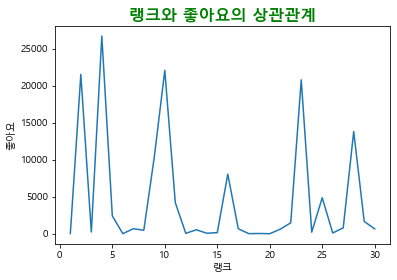

In [309]:
# 1위부터 30위 까지의 랭크 & 좋아요 사이의 그래프

a = []
b = []
for i in range(30):
    a.append(top100_song_list['Rank'][i])
    b.append(top100_song_list['Like'][i])

plt.plot(a, b)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('랭크')
plt.ylabel('좋아요')
plt.title('랭크와 좋아요의 상관관계', fontdict=title_font)
plt.show()

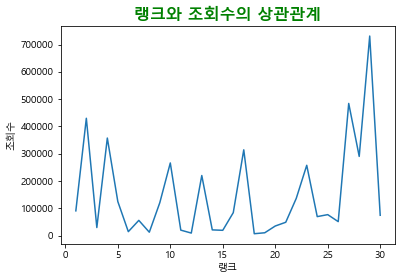

In [310]:
# 1위부터 30위 까지의 랭크 & 조회수 사이의 그래프
a = []
b = []
for i in range(30):
    a.append(top100_song_list['Rank'][i])
    b.append(top100_song_list['Hit'][i])

plt.plot(a, b)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('랭크')
plt.ylabel('조회수')
plt.title('랭크와 조회수의 상관관계', fontdict=title_font)
plt.show()

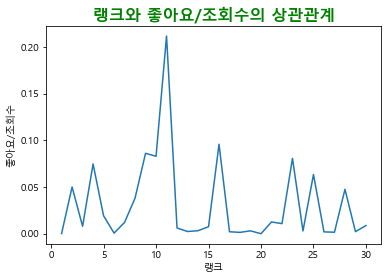

In [311]:
# 1위부터 30위 까지의 랭크 & 좋아요/조회수 사이의 그래프
a = []
b = []
for i in range(30):
    a.append(top100_song_list['Rank'][i])
    b.append(top100_song_list['Like'][i]/top100_song_list['Hit'][i])
plt.plot(a, b)

title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('랭크')
plt.ylabel('좋아요/조회수')
plt.title('랭크와 좋아요/조회수의 상관관계', fontdict=title_font)
plt.show()

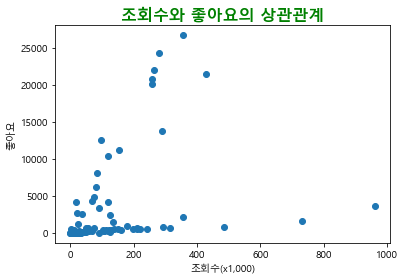

In [14]:
plt.scatter(top100_song_list['Hit']/1000, top100_song_list['Like'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('조회수(x1,000)')
plt.ylabel('좋아요')
plt.title('조회수와 좋아요의 상관관계', fontdict=title_font)
plt.show()

In [373]:
# 위의 산점도 그래프가 2방향으로 나뉘기 때문에 크게 벗어난 데이터 갯수를 세어 표본으로 하여 그래프를 다시 그림
like_sort = top100_song_list.sort_values(by='Like', ascending=False)
hit_sort = top100_song_list.sort_values(by='Hit', ascending=False)

In [374]:
like_sort_top5 = like_sort['Like'].head(5) # like 기준으로 내림차순 like 상위 5개
like_sort_top5_hit = like_sort['Hit'].head(5) # like 기준으로 내림차순 hit 상위 5개
hit_sort_top3 = hit_sort['Hit'].head(3) # hit 기준으로 내림차순 hit 상위 3개
hit_sort_top3_like = hit_sort['Like'].head(3) # hit 기준으로 내림차순 like 상위 3개

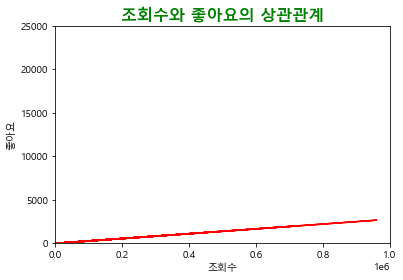

In [375]:
# hit를 기준으로 상위 3개 그래프
plt.plot(top100_song_list['Hit'], top100_song_list['Hit'] * (hit_sort_top3_like.mean()/hit_sort_top3.mean()), 'r')
plt.ylim(0, 25000)
plt.xlim(0, 1000000)
plt.xlabel('조회수')
plt.ylabel('좋아요')
plt.title('조회수와 좋아요의 상관관계', fontdict=title_font)
plt.show()

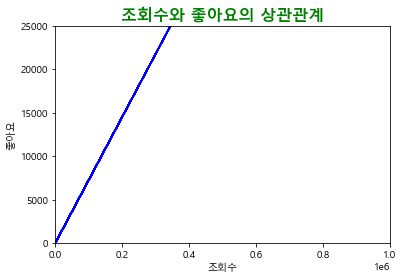

In [371]:
# like를 기준으로 상위 5개 그래프
plt.plot(top100_song_list['Hit'], top100_song_list['Hit'] * (like_sort_top5.mean()/like_sort_top5_hit.mean()), 'b')
plt.ylim(0, 25000)
plt.xlim(0, 1000000)
plt.xlabel('조회수')
plt.ylabel('좋아요')
plt.title('조회수와 좋아요의 상관관계', fontdict=title_font)
plt.show()

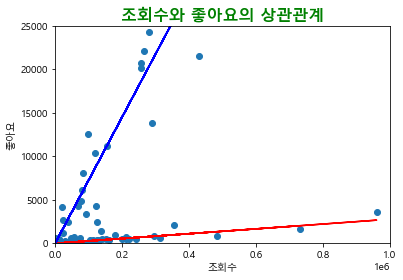

In [370]:
plt.scatter(top100_song_list['Hit'], top100_song_list['Like'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.plot(top100_song_list['Hit'], top100_song_list['Hit'] * (hit_sort_top5_like.mean()/hit_sort_top5.mean()), 'r')
plt.plot(top100_song_list['Hit'], top100_song_list['Hit'] * (like_sort_top5.mean()/like_sort_top5_hit.mean()), 'b')
plt.ylim(0, 25000)
plt.xlim(0, 1000000)
plt.xlabel('조회수')
plt.ylabel('좋아요')
plt.title('조회수와 좋아요의 상관관계', fontdict=title_font)
plt.show()

In [167]:
x = (top100_song_list['Like']/top100_song_list['Hit']).sort_values(ascending=False)
x.head(6)
# top5 는 0.09이상으로 결정

10    0.211735
70    0.194417
55    0.126742
78    0.115831
15    0.095834
58    0.086930
dtype: float64

In [168]:
y = (top100_song_list['Like']/top100_song_list['Hit']).sort_values()
y.head(9)
# bottom5는 0.000305 이하로 결정 - 위의 3자료는 분자값이 0이므로 분석에서 제외

99    0.000000
80    0.000000
56    0.000000
19    0.000057
43    0.000119
93    0.000250
0     0.000276
61    0.000304
86    0.000341
dtype: float64

In [113]:
top5_list = []
for i in range(len(top100_song_list)):
    x = top100_song_list['Like'][i]/top100_song_list['Hit'][i]
    if  x > 0.09:
        top5_list.append(top100_song_list['Title'][i])

bottom5_list = []
for i in range(len(top100_song_list)):
    x = top100_song_list['Like'][i]/top100_song_list['Hit'][i]
    if   x < 0.000305:
        bottom5_list.append(top100_song_list['Title'][i])


In [114]:
top5_list

['당신이 김호중을 처음 만난다면? 사람들 리얼반응 모음.zip',
 '‘넌 나의 20대였어’ ♬ 영탁의 뜨거웠던 20대 시절..',
 '김호중의 마지막 인사   만개 ㅣ김호중의파트너 EP.5',
 '♪ 소양강 처녀 가인이어라~  - 강원도 힐링 타임 - [트롯 전국체전]',
 '※최초공개※ 김준수 신곡 ‘Pit a Pat’ ♬ 올하트~♥']

In [115]:
bottom5_list[3:]

['신라왕족 고분 위 주차한 SUV 운전자 찾았다…경주시 "고발"',
 '풀영상 대한민국 vs 카타르',
 "[더뉴스-더인터뷰] 호텔까지 공공물량 '영끌'...전세난 해법 가능할까?",
 '하루 확진자 300명인데…노마스크로 MVP 거부',
 '10명 이상 신규 집단감염 하루 10건...81일만에 3백 명대']

#### 결과 : 좋아요나 조회수가 현재 랭크를 결정하는 기준에 영향을 준다는 것은 알 수 없지만, 산점도 그래프에서 기울기가 클수록(조회수 별 좋아요가 많을 경우) 가요프로그램이 많았고, 기울기가 낮을수록(조회수 별 좋아요가 적을 경우) 뉴스쪽 영상이 많았다.

### 11월 18일과 11월 19일 데이터 비교
#### 비교 기준 : 11.18 오후 4시 ~ 오후 5시 & 11.19 오후 3시 ~ 오후 4시

In [4]:
top100_song_list = pd.read_csv('top100_song_list.csv') # 11.18일 4 ~ 5시 사이 데이터

In [3]:
top100_song_list1 = pd.read_csv('top100_song_list1.csv') # 11.19일 3 ~ 4시 사이 데이터

In [5]:
title = []
hit = []
like = []
rank = []
for i in range(len(top100_song_list)):
    for k in range(len(top100_song_list1)):
        x = top100_song_list
        y = top100_song_list1
        if x['Title'][i] == y['Title'][k]:
            a = y['Like'][k] - x['Like'][i]
            b = y['Hit'][k] - x['Hit'][i]
            c = y['Rank'][k] - x['Rank'][i]
            title.append(x['Title'][i])
            hit.append(a)
            like.append(b)
            rank.append(c)

In [6]:
comp = pd.DataFrame({
    'Title': title,
    'Hit': hit,
    'Like': like,
    'Rank': rank
})
comp

,Title,Hit,Like,Rank
0,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,138,12976,1
1,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,373,15117,-2
2,소름이 쫘-악↗ 이찬원✕옥진욱 ‘남자라는 이유로’ ♪,117,8178,-1
3,임영웅 ‘오랜만이야’ ♪ 가슴 찡-한 무대😥,226,4575,1
4,당신이 김호중을 처음 만난다면? 사람들 리얼반응 모음.zip,1025,6208,3
5,SK 야수FA 보강 절실 / LG 윌슨 교체 가능성 / 롯데 성민규-허문회 내년에도 함께,51,11503,79
6,HL 대한민국 vs 카타르,64,23263,48
7,[매부리TV] 내년 집값이 위험한 이유/ 이광수 미래에셋증권 연구원,51,20399,78
8,‘넌 나의 20대였어’ ♬ 영탁의 뜨거웠던 20대 시절..,137,5398,-6
9,"[전체HL] '나성범 4안타+알테어 홈런' NC, 두산 잡고 기선제압",44,11122,37


In [7]:
comp.sort_values(by='Like', ascending=False)

,Title,Hit,Like,Rank
13,"[8회 예고] 유진, 헤라팰리스 입성할 수 있을까?!",88,47508,68
12,소원 불만가득♨ 20만원 꽃다발에 급 과거 회상..😩,47,28498,7
10,“제일 중요한 건 너야” 습관 바꾸라는 엄마,66,23355,59
6,HL 대한민국 vs 카타르,64,23263,48
7,[매부리TV] 내년 집값이 위험한 이유/ 이광수 미래에셋증권 연구원,51,20399,78
16,소원의 빅피처? “누가 혜정이 옷 사주니까~”,23,18995,17
15,"“내 자식이기도 해요” 이지아, 쌍둥이 압박하는 엄기준에 든 반기!",63,17570,57
1,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,373,15117,-2
0,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,138,12976,1
5,SK 야수FA 보강 절실 / LG 윌슨 교체 가능성 / 롯데 성민규-허문회 내년에도 함께,51,11503,79


In [8]:
comp.sort_values(by='Rank')

,Title,Hit,Like,Rank
20,두산-NC 풀영상,16,7177,-25
25,김희재✕이수영 ‘슬픈 사랑의 노래’ ♫ 감미로운 듀엣..,61,3065,-14
19,마음 도난 주의보 발령~ 하늘에서 영탁이 내려와♬♡,121,3934,-8
17,‘I Believe’ ♫ 희재가 100점 받을 거라 믿어요😘,57,3961,-8
11,기대하세요~ 소름 돋는 14살의 절절함 ‘사모’♪,121,6030,-7
21,나왔다! 찬원이의 필살기↗ ‘미운 사내’ ♬,21,1601,-6
8,‘넌 나의 20대였어’ ♬ 영탁의 뜨거웠던 20대 시절..,137,5398,-6
18,텐션 올려서 갑시다! 93년으로~ ‘처음 그 느낌처럼’♪,114,2798,-5
14,[풀버전] 사랑의 콜센타 이찬원 '떠나는 임아' ♫,65,2029,-5
1,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,373,15117,-2


In [9]:
comp.sort_values(by='Hit', ascending=False)

,Title,Hit,Like,Rank
4,당신이 김호중을 처음 만난다면? 사람들 리얼반응 모음.zip,1025,6208,3
1,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,373,15117,-2
3,임영웅 ‘오랜만이야’ ♪ 가슴 찡-한 무대😥,226,4575,1
26,‘고백’ ♬ 크러쉬 ✕ MC웅의 숨겨왔던 랩 실력🎤,155,10730,0
0,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,138,12976,1
8,‘넌 나의 20대였어’ ♬ 영탁의 뜨거웠던 20대 시절..,137,5398,-6
24,‘Beautiful’♪ 전주부터 차오르는 감성 영웅♥,131,6480,11
19,마음 도난 주의보 발령~ 하늘에서 영탁이 내려와♬♡,121,3934,-8
11,기대하세요~ 소름 돋는 14살의 절절함 ‘사모’♪,121,6030,-7
2,소름이 쫘-악↗ 이찬원✕옥진욱 ‘남자라는 이유로’ ♪,117,8178,-1


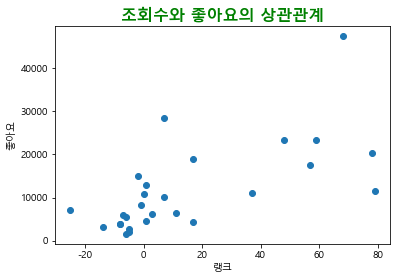

In [10]:
plt.scatter(comp['Rank'], comp['Like'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('랭크')
plt.ylabel('좋아요')
plt.title('조회수와 좋아요의 상관관계', fontdict=title_font)
plt.show()

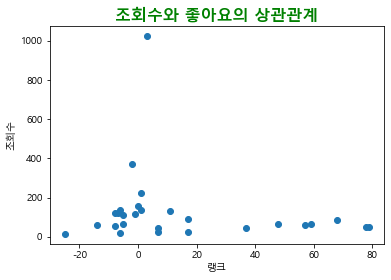

In [11]:
plt.scatter(comp['Rank'], comp['Hit'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('랭크')
plt.ylabel('조회수')
plt.title('조회수와 좋아요의 상관관계', fontdict=title_font)
plt.show()

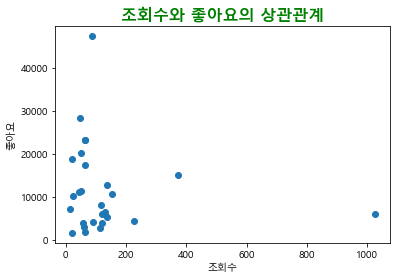

In [12]:
plt.scatter(comp['Hit'], comp['Like'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('조회수')
plt.ylabel('좋아요')
plt.title('조회수와 좋아요의 상관관계', fontdict=title_font)
plt.show()